### Understanding the dataset features

As per the source from where the dataset was taken, the following assumptions have been taken into consideration:

- datetime: Hourly date + Timestamp  
- season: 
     -  1 = spring
     -  2 = summer
     -  3 = fall 
     -  4 = winter 
- holiday:
     - 0 = no holiday
     - 1 = holiday
- workingday:
     - 0 = neither a holiday nor weekend
     - 1 = holiday or weekend
- weather:

    - 1 = Clear, Few clouds, Partly cloudy, Partly cloudy 

    - 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

    - 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

    - 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- temp:  Temperature in Celsius
- atemp: "Feels like" temperature in Celsius
- humidity: relative humidity
- windspeed: wind speed
- casual: number of non-registered user rentals initiated
- registered: number of registered user rentals initiated
- count:  number of total rentals

##### Loading all the libraries

In [217]:
#data manipulation libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


##### Setting the graph styles

In [218]:
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes= True)


##### Loading data into dataframes and getting the names of all the features

In [219]:
train_data = pd.read_csv('Dataset/train.csv')
test_data  = pd.read_csv('Dataset/test.csv')
train_data.head()
test_data.head()
train_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

##### Analyzing the types of columns and checking for null values if any

In [220]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The given dataset has 12 features which are all numeric.  
As we can obsserve, as of now, there are no null values in this given training data, hence no imputation is required. However, later as we will build the model, we would add a module to handle missing values, so if the model is retrained with some new training data with missing values, it can adapt itself. However, keeping the full focus to exploratory data analysis as of now.

### Exploring the different features of the dataset

The features are of two type -- Discrete and Continuous. 
In the given dataset, discrete features are weather, holiday,working day, season. We will also extract the hour,year,month,day features from the timestamp column which would be discrete features.
The continuous variables are temp,atemp,humidity,windspeed,casual,registered,count.

Before beginning the analysis, let us first, split the datetime column to extract hour,day,month and year.

In [221]:
#Doing for training data

train_df = train_data.copy()
train_df["hour"] = [i.hour for i in pd.DatetimeIndex(train_data.datetime)]
train_df["day"] = [i.dayofweek for i in pd.DatetimeIndex(train_data.datetime)]
train_df["month"] = [i.month for i in pd.DatetimeIndex(train_data.datetime)]
train_df['year'] = [i.year for i in pd.DatetimeIndex(train_data.datetime)]
train_df.drop('datetime',axis=1,inplace=True)
train_df.head()

#Doing for test data
test_df = test_data.copy()
test_df["hour"] = [i.hour for i in pd.DatetimeIndex(test_data.datetime)]
test_df["day"] = [i.dayofweek for i in pd.DatetimeIndex(test_data.datetime)]
test_df["month"] = [i.month for i in pd.DatetimeIndex(test_data.datetime)]
test_df['year'] = [i.year for i in pd.DatetimeIndex(test_data.datetime)]
test_df.drop('datetime',axis=1,inplace=True)
test_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,2011


#### Summary of the complete data

In [222]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,3.013963,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,2.004585,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,12.000000,2012.000000


[Text(0.5, 1.0, 'Bike usage during weekdays and weekends')]

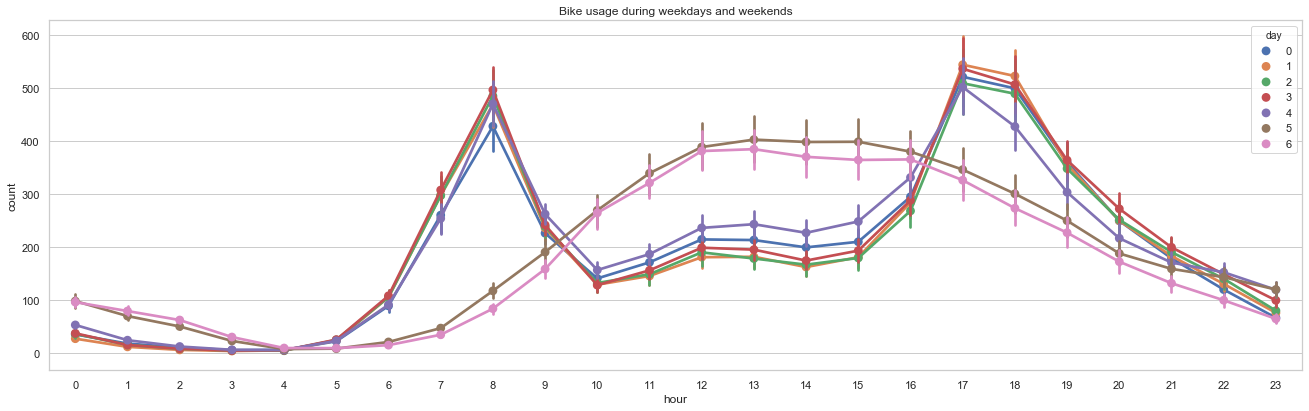

In [223]:
# Hourly trend on different days 
fig, ax = plt.subplots(figsize=(20,6))
sns.pointplot(data=train_df[['hour','count','day']],x='hour', y='count',hue='day', ax=ax)
ax.set(title="Bike usage during weekdays and weekends")

We can see that usage is different on work days and on weekends. On Sundays and Saturdays, people use more the bikes during afternoon, while during work days, bikes are mostly used to go and come from work/school.

[Text(0.5, 1.0, 'Bike by registered users')]

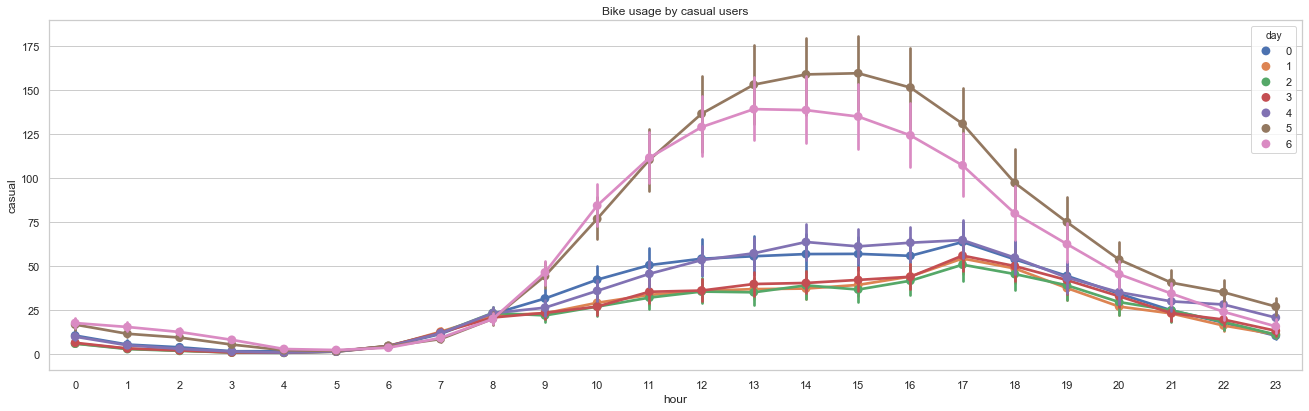

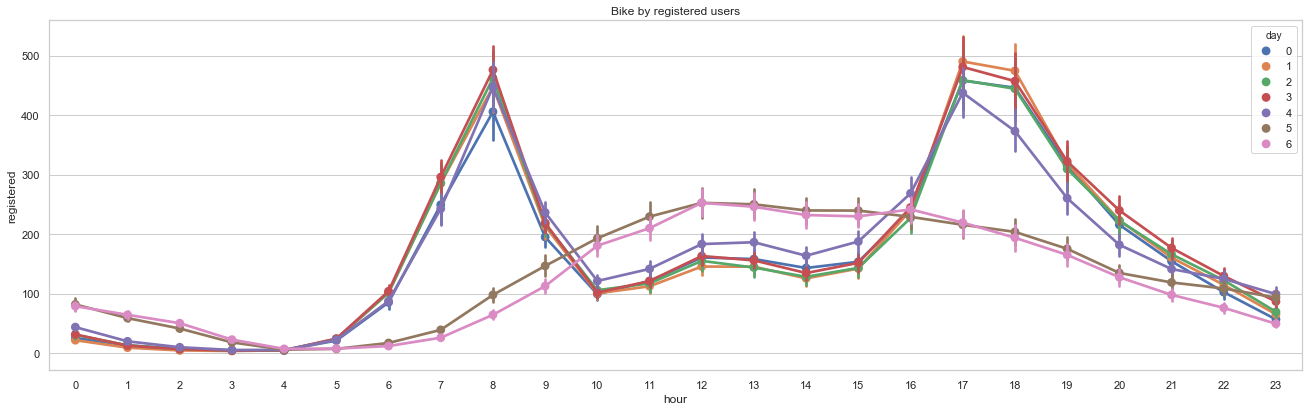

In [224]:
# Hourly trend of casual users on weekdays
fig, ax = plt.subplots(figsize=(20,6),)
sns.pointplot(data=train_df[['hour','casual','day']],x='hour', y='casual',hue='day', ax=ax)
ax.set(title="Bike usage by casual users")

# Hourly trend of registered users on weekdays
fig, ax = plt.subplots(figsize=(20,6))
sns.pointplot(data=train_df[['hour','registered','day']],x='hour', y='registered',hue='day', ax=ax)
ax.set(title="Bike by registered users")

We see that casual users tend to use the bikes during afternoon during the all week, while registered users follow the general trend of leisure on weekends and usage during peak hours on work days. However,we can also observe that 'count' is obtained from these 2 variables, hence may cause a problem while building models. Hence, we can remove these 2 features from our datasets.

In [225]:
train_df.drop('casual',axis=1,inplace=True)
train_df.drop('registered',axis=1,inplace=True)
train_df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,2011


Now let us see the distribution of counts over different seasons, weather patterns , holiday, working day and weekend.  

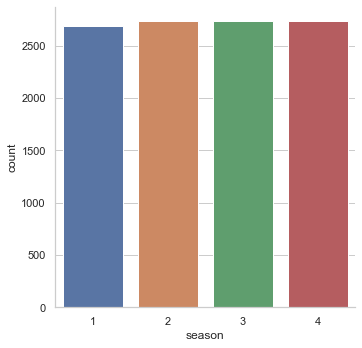

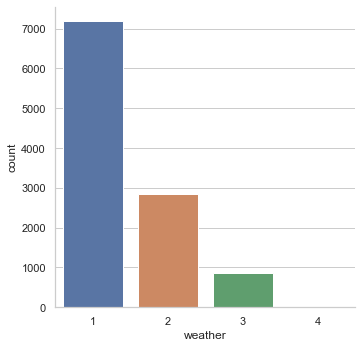

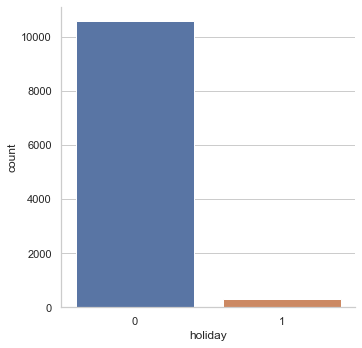

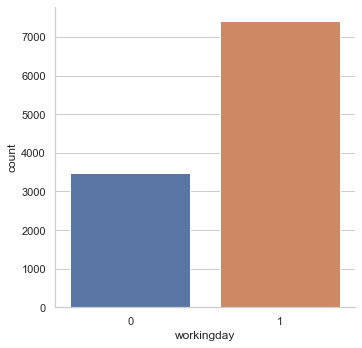

In [226]:
sns.catplot(x='season',data=train_df,kind='count',height=5)
sns.catplot(x='weather',data=train_df,kind='count',height=5)
sns.catplot(x='holiday',data=train_df,kind='count',height=5)
sns.catplot(x='workingday',data=train_df,kind='count',height=5)

#### Major inferences from the above plots
- Over all seasons the demands are almost equal.
- Weather plays an important role when it come to using bikes. People prefer not at all to rent bikes in rainy weather. More     the precipitation, lesser are the chances of renting bike. Hence dips in rentals can be seen.
- Majority of data is for non-holiday days is what we can deduce from the 'holiday vs count' plot
- Also, majority of the data is for working days, as depicted by 'workingday vs count' plot

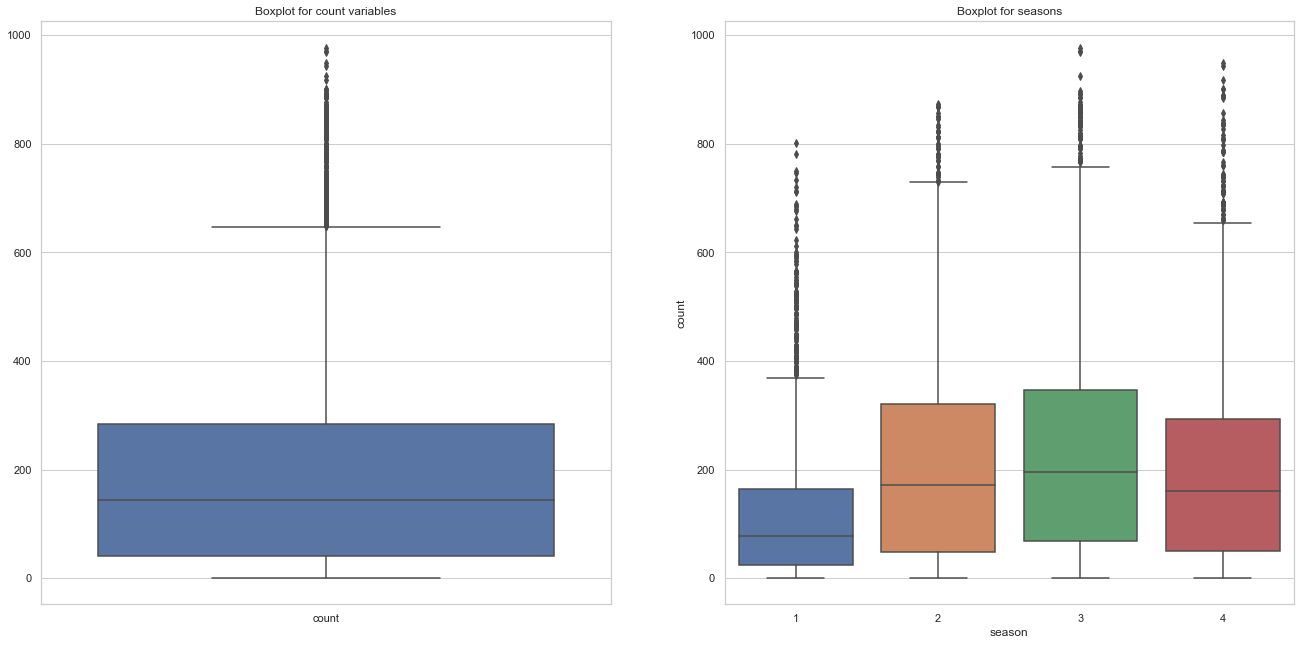

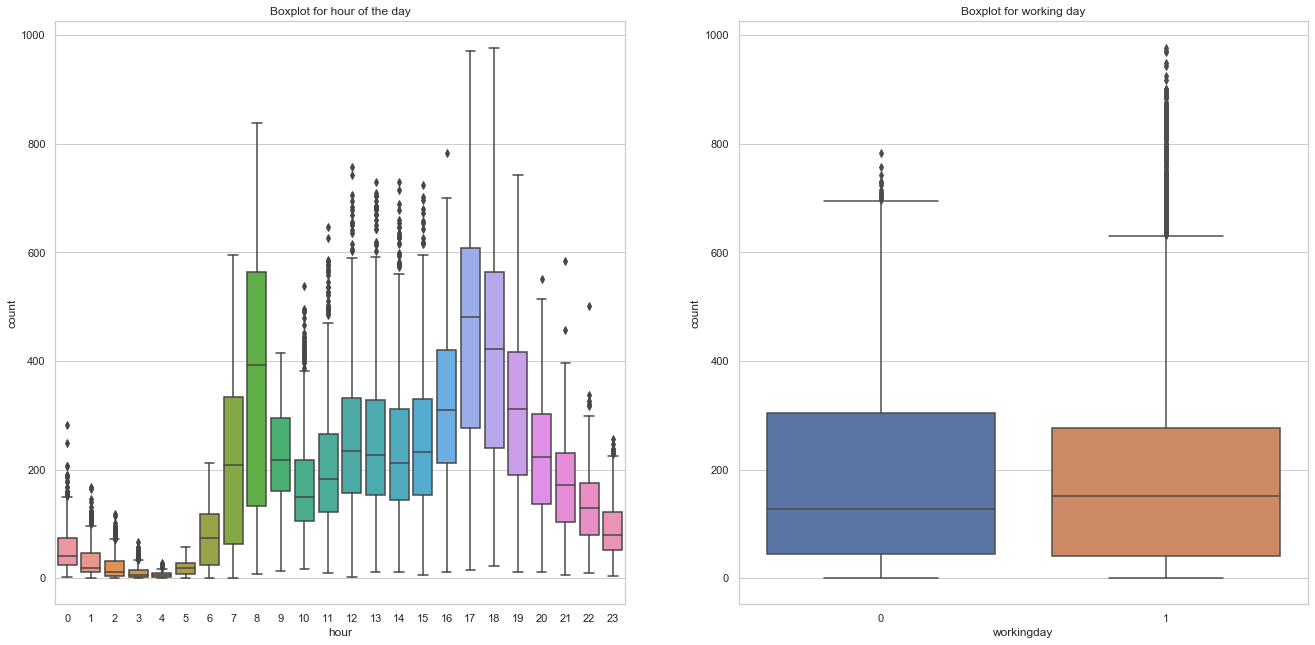

In [227]:
# Checking for outliers by creating the boxplots
fig, axs = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(data=train_df[['count']], ax=axs[0])
axs[0].set(title="Boxplot for count variables")
sns.boxplot(x=train_df['season'],y=train_df['count'], ax=axs[1])
axs[1].set(title="Boxplot for seasons")

fig,axs = plt.subplots(ncols=2, figsize=(20,10))
axs[0].set(title="Boxplot for hour of the day")
sns.boxplot(x=train_df['hour'],y=train_df['count'], ax=axs[0])
axs[1].set(title="Boxplot for working day")
sns.boxplot(x=train_df['workingday'],y=train_df['count'], ax=axs[1])

Checking the bike rental pattern/trend over the months

[Text(0.5, 1.0, 'Monthly distribution')]

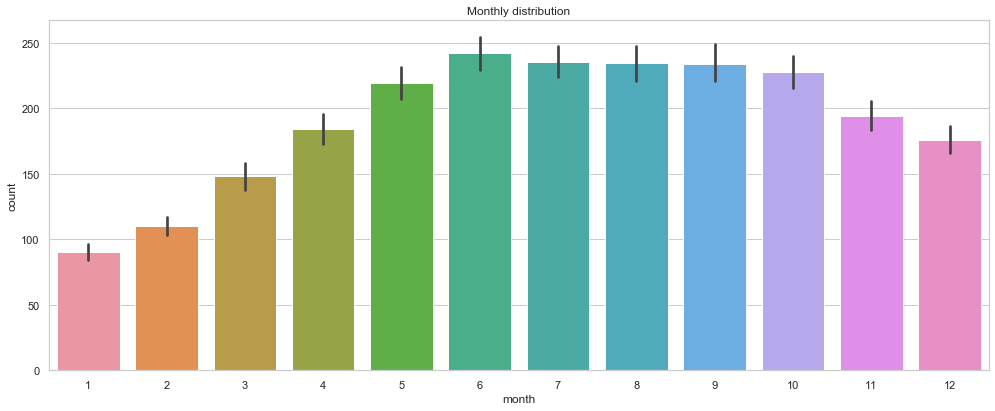

In [228]:
#Monthly trend

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=train_df[['month','count']],x='month', y='count')
ax.set(title="Monthly distribution")

We can see that counts are normally distributed over months. June is the most preferred month for renting the bikes. Hence, logistics have to be planned accordingly seeing the trend. 

##### Histograms for distributions of the continuous variables.

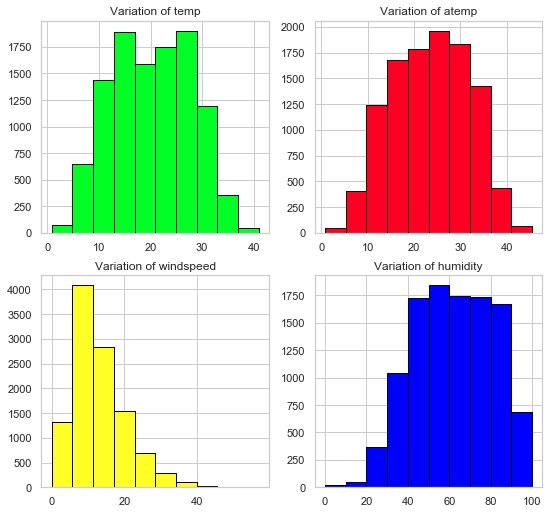

In [229]:
train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=1,color='#00ff25')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=1,color='#ff0025')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=1,color='#ffff25')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=1,color='#0000ff')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(8,8)

#### Inferences based on the above histograms
- People avoid renting bikes in extreme temperatures.
- The plots for temp and atemp are quite similar and have a direct relation.
- After a windspeed limit, somewhere between 10-15, people tend to discourage renting bikes.
- Extremely dry weather is worst for renting bikes. However, we also observe a sharp dip in rentals when humidity is beyond 80


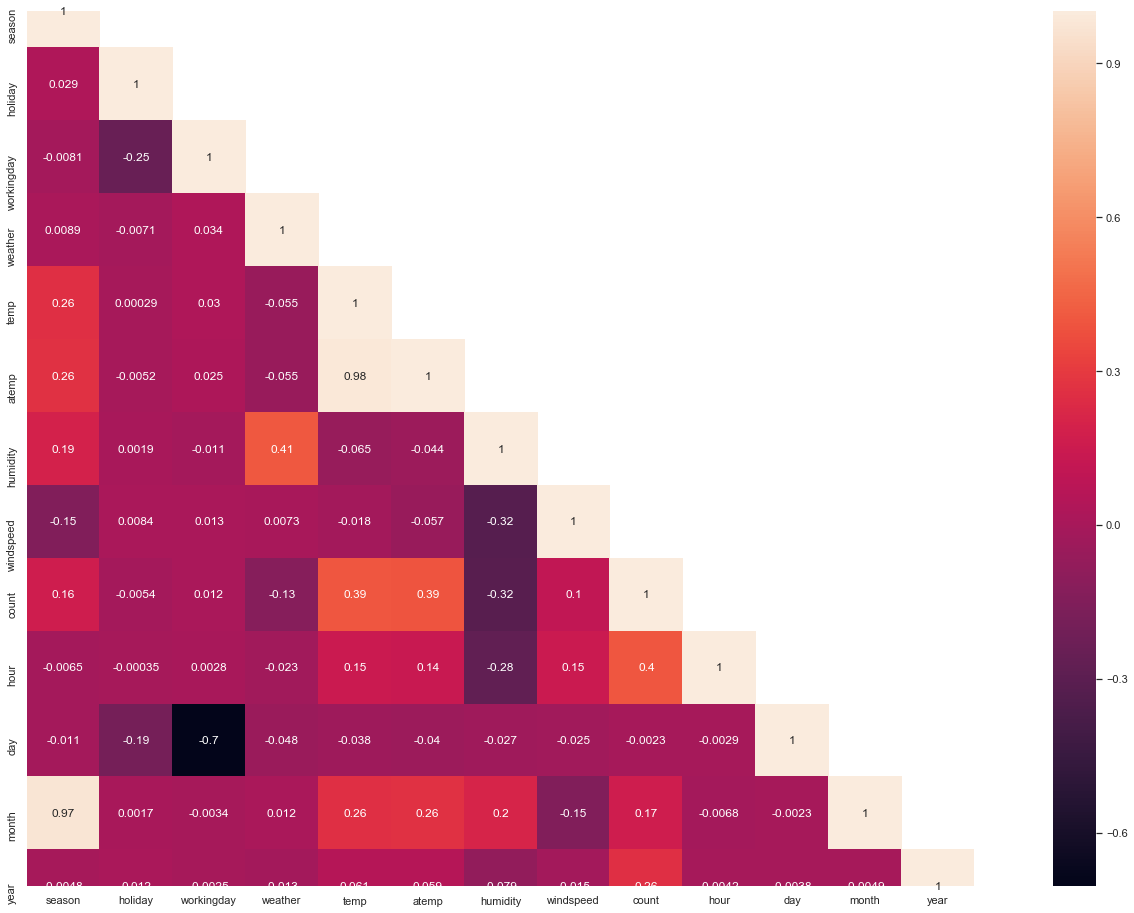

In [230]:
#Correlation matrix
corr_mat= train_df[:].corr()
corr_to_arr = np.array(corr_mat)
corr_to_arr[np.tril_indices_from(corr_to_arr)] = False
fig=plt.gcf()
fig.set_size_inches(25,15)
sns.heatmap(data=corr_mat,mask=corr_to_arr,square=True,annot=True,cbar=True)

#### INFERENCES FROM THE ABOVE HEATMAP
- temp and atemp are highly related as expected.
- Inverse relationship between humidity is inversely and count implying people tend not to rent a bike in humid weather.
- Also note that temp(or atemp) highly effects the count. 
- The hour of the day plays a vital role in the bike rental system.


##### Performing one hot encoding

One-hot encoding is done to handle categorical values in a better way. In our dataset, we have assumed the seasons, weathers,months, days, hour etc. columns to be numeric. For example, as previously mentioned, for seasons , 1 is for 'spring' , 2  for 'summer' and so on. In our case, these categorical variables have equal weightages,that means 2 is not better than 1. 

Thus we need to do something so that the model that we are later going to build doesn't misinterpret our variables. Hence, to avoid such situation we perform one-hot encoding.

In [231]:
encoded_data_dummy = train_df
def dummify_dataset(df, col):       
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)],axis=1)
    df = df.drop([col], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'day', 'workingday', 'weather']
for column in columns_to_dummify:
    encoded_data_dummy = dummify_dataset(encoded_data_dummy, column)
    
encoded_data_dummy.head(10)

,temp,atemp,humidity,windspeed,count,year,season_2,season_3,season_4,month_2,...,day_1,day_2,day_3,day_4,day_5,day_6,workingday_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,16,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9.02,13.635,80,0.0000,40,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9.02,13.635,80,0.0000,32,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,9.84,14.395,75,0.0000,13,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,9.84,12.880,75,6.0032,1,2011,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,9.02,13.635,80,0.0000,2,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,8.20,12.880,86,0.0000,3,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,9.84,14.395,75,0.0000,8,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,13.12,17.425,76,0.0000,14,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now observing the correlation with the newly enhanced features. 

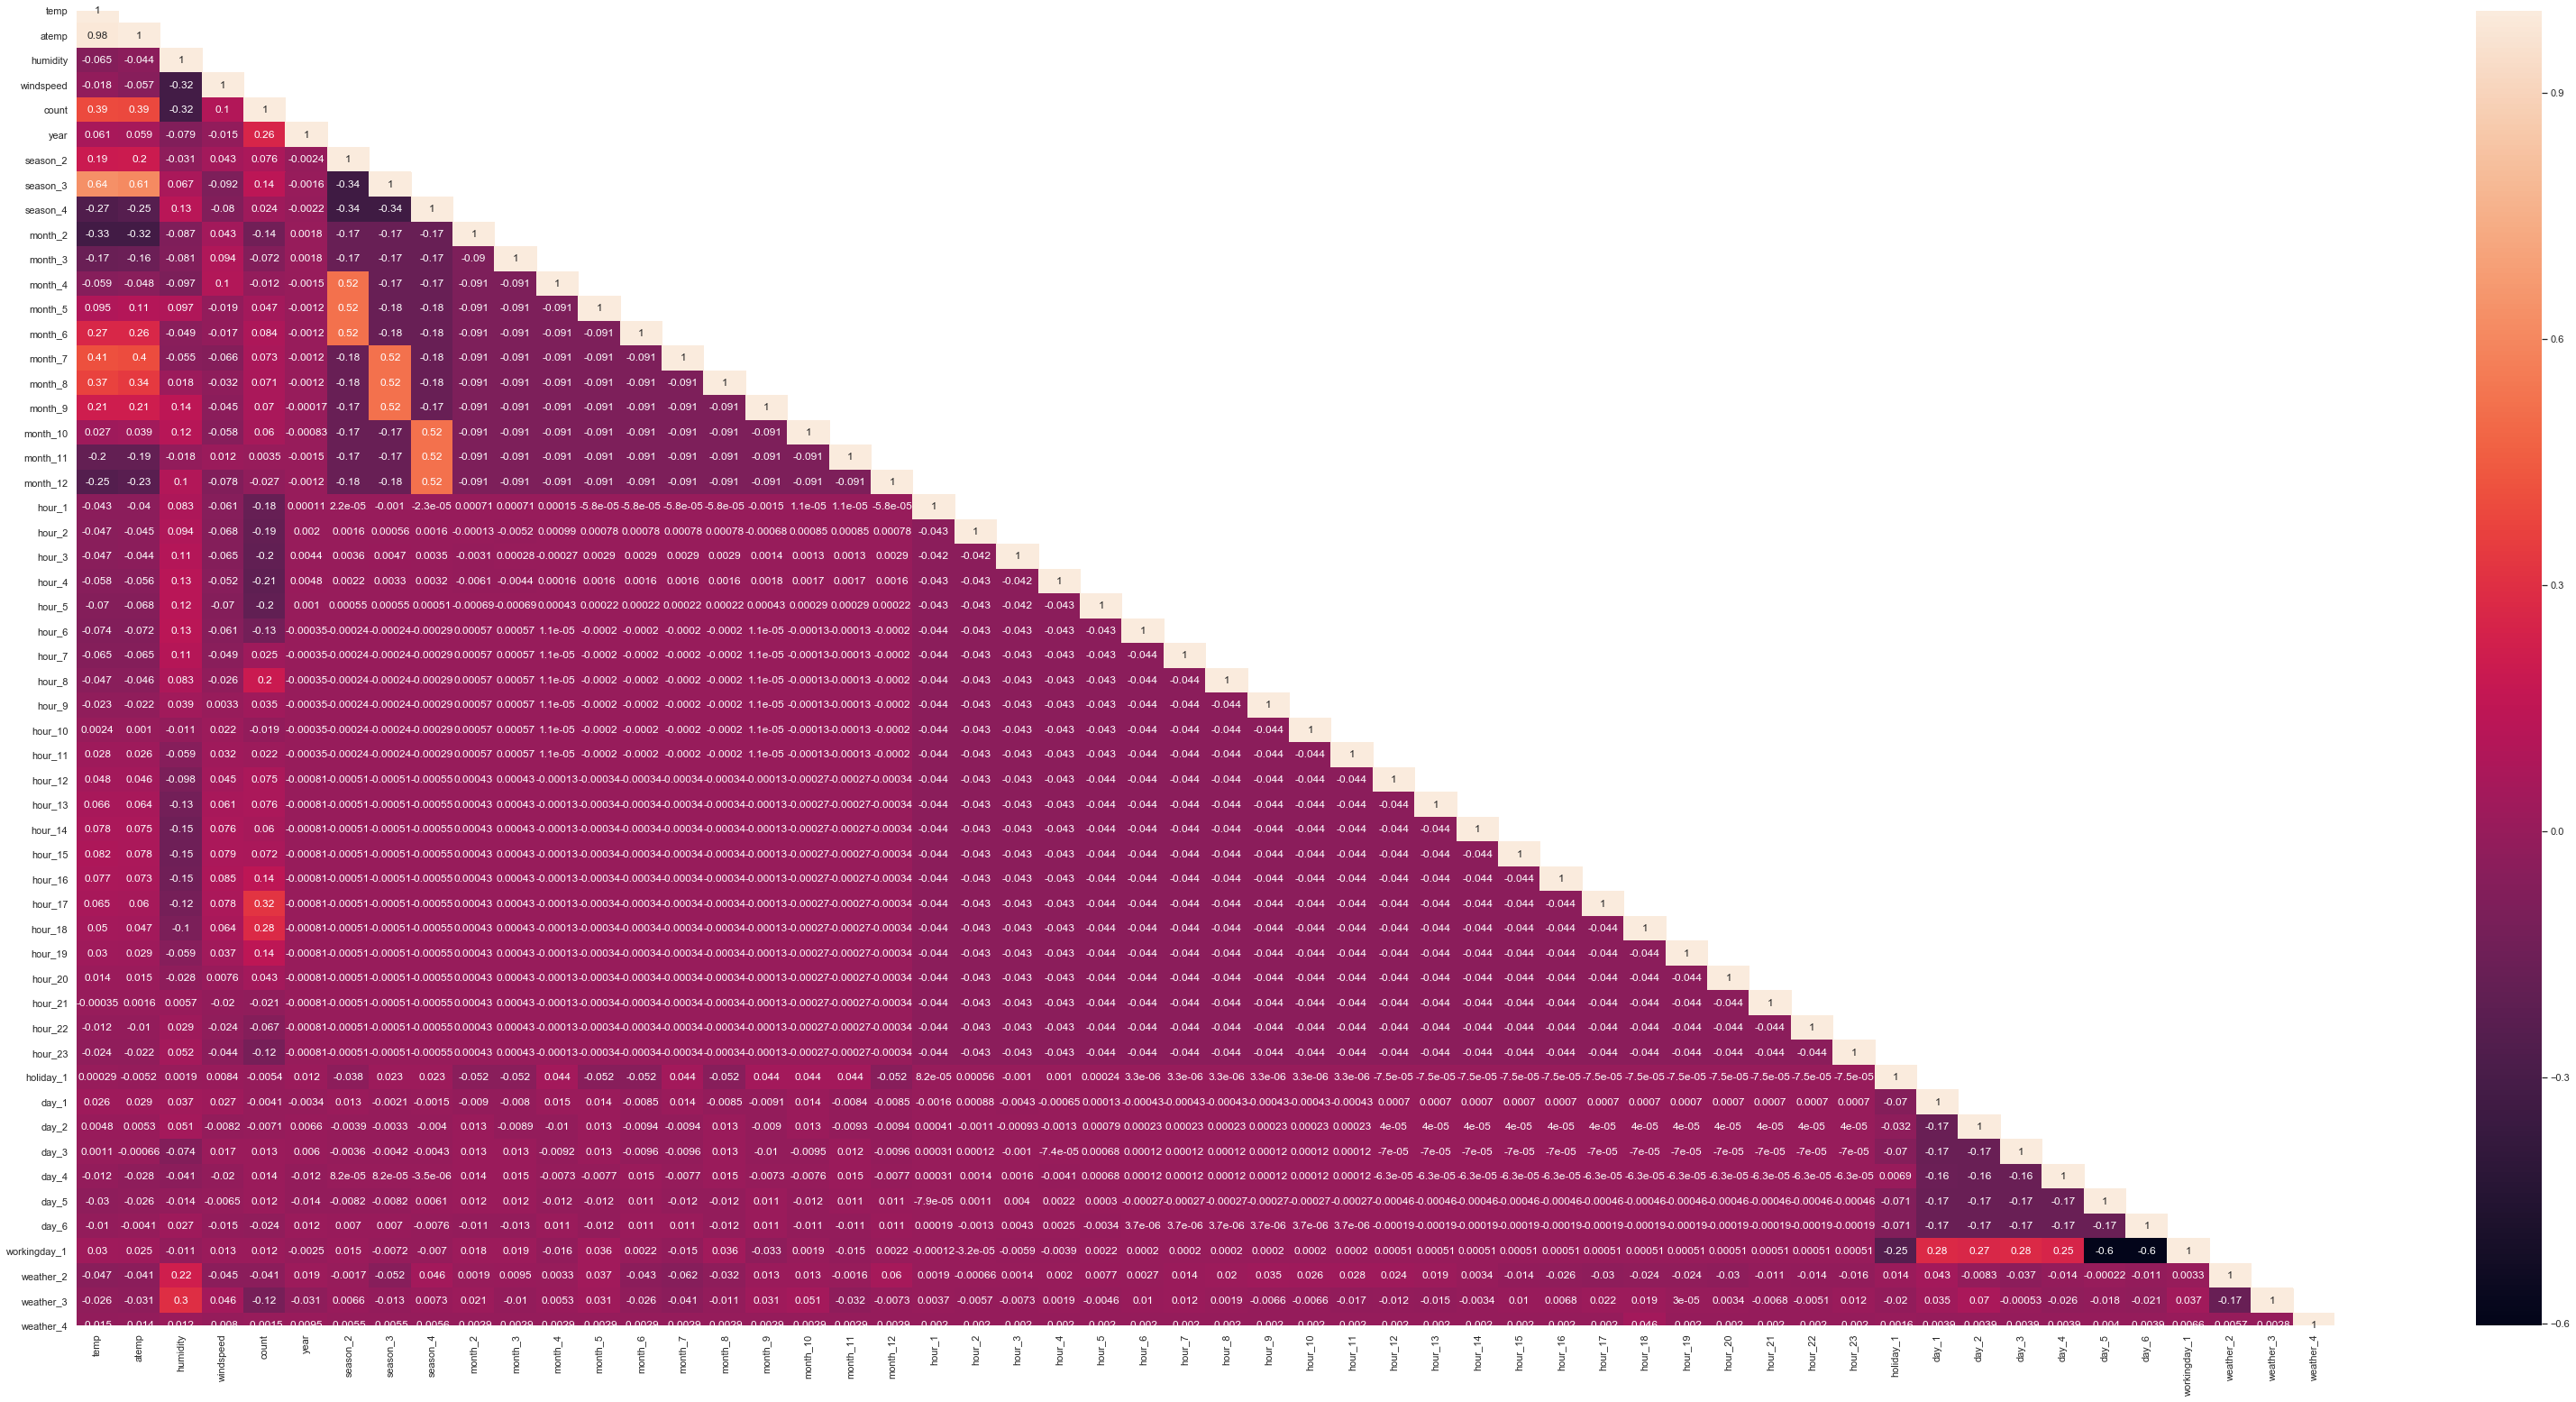

In [232]:
#Correlation matrix
# As the no.of features have increased to 54, we will also save this plot as an image for better clarity 
train_df= encoded_data_dummy
corr_mat= train_df[:].corr()
corr_to_arr = np.array(corr_mat)
corr_to_arr[np.tril_indices_from(corr_to_arr)] = False
fig=plt.gcf()
fig.set_size_inches(50,25)
sns.heatmap(data=corr_mat,mask=corr_to_arr,annot=True,cbar=True)
fig.savefig('PlotImages/Correlation_matrix_dataset')